In [35]:
from fears.population import Population
from fears.utils import fitness
import numpy as np
import matplotlib.pyplot as plt

def int_to_binary(num,n_genotype=4):
    """
    Converts an integer to binary representation with the number of 
    digits equal to the number of alleles in the model.

    Parameters
    ----------
    num : int
        Number to be converted.

    Returns
    -------
    str
        Binary representation.

    """
    pad = int(np.log2(n_genotype))
    return bin(num)[2:].zfill(pad)

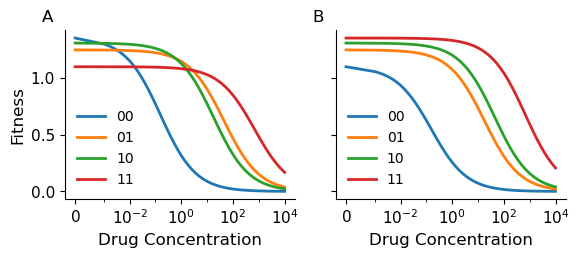

In [42]:
# ic50 = [3.64972198, 3.24736065, 1.19048008, 4.8325847 ]
ic50 = [1.19048008, 3.64972198, 3.24736065, 4.8325847 ]
ic50 = [x-2 for x in ic50]
# drugless_rates = [, 1.2457132 , 1.3496418 , 1.09728462]
drugless_rates = [1.3496418 , 1.2457132 ,1.30573026 , 1.09728462]

p = Population(fitness_data='random',death_model=None)
p.ic50 = ic50
p.drugless_rates = drugless_rates

xdata = np.logspace(-3,4)
xdata = np.append([0],xdata)

fig,ax_list = plt.subplots(ncols=2,figsize=(6,2.7),sharey=True,sharex=True)
ax = ax_list[0]
for i in range(4):
    ydata = []
    for x in xdata:
        ydata.append(fitness.gen_fitness(p,i,x))
    ax.plot(xdata,ydata,linewidth=2,label=int_to_binary(i))

ax.set_xscale('symlog',linthresh=10**-3)

ax.legend(frameon=False)

ic50 = np.sort(ic50)
drugless_rates = np.sort(drugless_rates)

p.ic50 = ic50
p.drugless_rates = drugless_rates

ax = ax_list[1]
for i in range(4):
    ydata = []
    for x in xdata:
        ydata.append(fitness.gen_fitness(p,i,x))
    ax.plot(xdata,ydata,linewidth=2,label=int_to_binary(i))

ax.set_xscale('symlog',linthresh=10**-3)

ax.legend(frameon=False)

for ax in ax_list:
    ax.set_xlabel('Drug Concentration',fontsize=12)
    ax.tick_params(axis='both',labelsize=11)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

ax_list[0].set_xticks([0,10**-2,10**0,10**2,10**4])

ax_list[0].set_ylabel('Fitness',fontsize=12)

ax_list[0].annotate('A',xy=(-0.1,1.05),xycoords='axes fraction',fontsize=12)
ax_list[1].annotate('B',xy=(-0.1,1.05),xycoords='axes fraction',fontsize=12)

fig.tight_layout()

fig.savefig('../figures/tradeoff_example.pdf',bbox_inches='tight')
